# ASSIGNMENT 3
# Submission Deadline: 17/11/21, 9 PM
# Submission Link: https://forms.gle/fq7g53adYcZW7UMz8 

Name: **PRAKHAR PANDEY**

Roll No.: **180527**

IITK EMail: **prkpndy@iitk.ac.in**

**Read all the instructions below carefully before you start working on the assignment.**
- The purpose of this course is that you learn RL and the best way to do that is by implementation and experimentation.
- The assignment requires your to implement some algorithms and you are required report your findings after experimenting with those algorithms.
- **You are required to submit ZIP file containing a Jupyter notebook (.ipynb), and an image folder. The notebook would include the code, graphs/plots of the experiments you run and your findings/observations. Image folder is the folder having plots, images, etc.**
- In case you use any maths in your explanations, render it using latex in the Jupyter notebook.
- You are expected to implement algorithms on your own and not copy it from other sources/class mates. Of course, you can refer to lecture slides.
- If you use any reference or material (including code), please cite the source, else it will be considered plagiarism. But referring to other sources that directly solve the problems given in the assignment is not allowed. There is a limit to which you can refer to outside material.
- This is an individual assignment.
- In case your solution is found to have an overlap with solution by someone else (including external sources), all the parties involved will get zero in this and all future assignments plus further more penalties in the overall grade. We will check not just for lexical but also semantic overlap. Same applies for the code as well. Even an iota of cheating would NOT be tolerated. If you cheat one line or cheat one page the penalty would be same.
- Be a smart agent, think long term, if you cheat we will discover it somehow, the price you would be paying is not worth it.
- In case you are struggling with the assignment, seek help from TAs. Cheating is not an option! I respect honesty and would be lenient if you are not able to solve some questions due to difficulty in understanding. Remember we are there to help you out, seek help if something is difficult to understand.
- The deadline for the submission is given above. Submit at least 30 minutes before the deadline, lot can happen at the last moment, your internet can fail, there can be a power failure, you can be abducted by aliens, etc.
- You have to submit your assignment via the Google Form (link above)
- The form would close after the deadline and we will not accept any solution. No reason what-so-ever would be accepted for not being able to submit before the deadline.
- Since the assignment involves experimentation, reporting your results and observations, there is a lot of scope for creativity and innovation and presenting new perspectives. Such efforts would be highly appreciated and accordingly well rewarded. Be an exploratory agent!
- Your code should be very well documented, there are marks for that.
- In your plots, have a clear legend and clear lines, etc. Of course you would generating the plots in your code but you must also put these plots in your notebook. Generate high resolution pdf/svg version of the plots so that it doesn't pixilate on zooming.
- For all experiments, report about the seed used in the code documentation, write about the seed used.
- In your notebook write about all things that are not obvious from the code e.g., if you have made any assumptions, references/sources, running time, etc.
- **DO NOT Forget to write name, roll no and email details above**
- For each of the sub-part in the question create a new cell below the question and put your answer in there. This includes the plots as well

In [1]:
# All imports go in here
import gym
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mc
import colorsys as cs
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from collections import deque
import random
import time

In [2]:
plt.rcParams['figure.figsize'] = [10, 10]

## OpenAI Gym Environments

In this assignment we will be exploring Deep RL algorithms and for this we will be using environmentd provided by OpenAI Gym. In particualr we will be exploring "CartPole-v0" and "MountainCar-v0" environments (https://gym.openai.com/docs/). The code to instantiate the environments are given in the cells below. Run these cells and play with the environments to learn more details about the environments. 

In [3]:
# Create CartPole environment
#https://github.com/openai/gym/wiki/CartPole-v0

# env = gym.make('CartPole-v0')
# env.seed(34)
# s = env.reset()
# print("Observation Space = ")
# print(env.observation_space)
# print("Action Space = ")
# print(env.action_space)
# done = False
# for episode in range(20):
#     print("In episode {}".format(episode))
#     for i in range(100):
#         env.render()
#         print(s)
#         a = env.action_space.sample()
#         s, r, done, _ = env.step(a)
#         if done:
#             print("Finished after {} timestep".format(i+1))
#             env.reset()
#             break
# env.close()

In [4]:
# Create MountainCar environment: 
# https://github.com/openai/gym/wiki/MountainCar-v0 

# env = gym.make('MountainCar-v0')
# env.seed(45)
# s = env.reset()
# print("Observation Space = ")
# print(env.observation_space)
# print("Action Space = ")
# print(env.action_space)
# done = False
# for episode in range(20):
#     print("In episode {}".format(episode))
#     for i in range(100):
#         env.render()
#         print(s)
#         a = env.action_space.sample()
#         s, r, done, _ = env.step(a)
#         if done:
#             print("Finished after {} timestep".format(i+1))
#             env.reset()
#             break
# env.close()

## Deep Value Based RL agents.

### The purpose of this assignment is to learn about different Deep Value Based RL agents.

In this assignment you will be implementing Deep RL algorithms we learnt in Lectures 12, 13, 14 and 15. Namely, we will be implementing NFQ, DQN, Double DQN (DDQN), Duelling Double DQN (D3QN), and Duelling Double DQN with Prioritized Experience Replay (D3QN-PER). For all the algorithms below, this time we will not be specifying the hyper-parameters, please play with the hyper-params to come up with the best values. This way you will learn to tune the model. Some of the values were specified in the lecture, that would be a good starting point. Your aim is to develop the best NFQ/DQN/DDQN/D3QN/D3QN-PER agent for each of the setting.  

For those of you who follow TEDEd, here is an interesting video by TED on DQN and Atari Games: https://www.youtube.com/watch?v=PP8Zc778B8s 

Also since these environments are available in OpenAI Gym, there are public leaderboards (https://github.com/openai/gym/wiki/Leaderboard) for each of these environments. Compare where does your agent stand on these leaderboard for each of these environments, try to tune your agents so that it is on the top of the leaderboard. In fact, if your agent performs well on these environments, you can alse make your entry on the leaderboard.  

### All your hyperparameters should be stated here. We will change their value here and your code should work  accordingly. 

In [63]:
# Mention the values of all the hyperparameters to be used in the entire notebook, put the values that gave the best 
# performance and were finally used for the agent

device = 'cpu'

MAX_TRAIN_EPISODES = 1000
MAX_EVAL_EPISODES = 1
EPSILON_START = 0.99

GAMMA_NFQ = {'CartPole-v0': 0.95, 'MountainCar-v0': 0.95}
EPOCH_NFQ = {'CartPole-v0': 2, 'MountainCar-v0': 2}
BUFFER_SIZE_NFQ = {'CartPole-v0': 512, 'MountainCar-v0': 512}
BATCH_SIZE_NFQ = {'CartPole-v0': 512, 'MountainCar-v0': 512}
LR_NFQ = {'CartPole-v0': 0.0001, 'MountainCar-v0': 0.0001}
MAX_TRAIN_EPISODES_NFQ = {'CartPole-v0': MAX_TRAIN_EPISODES, 'MountainCar-v0': MAX_TRAIN_EPISODES}
MAX_EVAL_EPISODES_NFQ = {'CartPole-v0': MAX_EVAL_EPISODES, 'MountainCar-v0': MAX_EVAL_EPISODES}

GAMMA_DQN = {'CartPole-v0': 0.95, 'MountainCar-v0': 0.95}
EPOCH_DQN = {'CartPole-v0': 2, 'MountainCar-v0': 2}
BUFFER_SIZE_DQN = {'CartPole-v0': 5000, 'MountainCar-v0': 5000}
BATCH_SIZE_DQN = {'CartPole-v0': 512, 'MountainCar-v0': 512}
LR_DQN = {'CartPole-v0': 0.001, 'MountainCar-v0': 0.001}
MAX_TRAIN_EPISODES_DQN = {'CartPole-v0': MAX_TRAIN_EPISODES, 'MountainCar-v0': MAX_TRAIN_EPISODES}
MAX_EVAL_EPISODES_DQN = {'CartPole-v0': MAX_EVAL_EPISODES, 'MountainCar-v0': MAX_EVAL_EPISODES}
UPDATE_FREQUENCY_DQN = {'CartPole-v0': 50, 'MountainCar-v0': 50}

GAMMA_DDQN = {'CartPole-v0': 0.95, 'MountainCar-v0': 0.95}
EPOCH_DDQN = {'CartPole-v0': 2, 'MountainCar-v0': 2}
BUFFER_SIZE_DDQN = {'CartPole-v0': 5000, 'MountainCar-v0': 5000}
BATCH_SIZE_DDQN = {'CartPole-v0': 512, 'MountainCar-v0': 512}
LR_DDQN = {'CartPole-v0': 0.001, 'MountainCar-v0': 0.001}
MAX_TRAIN_EPISODES_DDQN = {'CartPole-v0': MAX_TRAIN_EPISODES, 'MountainCar-v0': MAX_TRAIN_EPISODES}
MAX_EVAL_EPISODES_DDQN = {'CartPole-v0': MAX_EVAL_EPISODES, 'MountainCar-v0': MAX_EVAL_EPISODES}
UPDATE_FREQUENCY_DDQN = {'CartPole-v0': 80, 'MountainCar-v0': 80}

GAMMA_D3QN = {'CartPole-v0': 0.95, 'MountainCar-v0': 0.95}
TAU_D3QN = {'CartPole-v0': 0.5, 'MountainCar-v0': 0.5}
EPOCH_D3QN = {'CartPole-v0': 2, 'MountainCar-v0': 2}
BUFFER_SIZE_D3QN = {'CartPole-v0': 5000, 'MountainCar-v0': 5000}
BATCH_SIZE_D3QN = {'CartPole-v0': 512, 'MountainCar-v0': 512}
LR_D3QN = {'CartPole-v0': 0.001, 'MountainCar-v0': 0.001}
MAX_TRAIN_EPISODES_D3QN = {'CartPole-v0': MAX_TRAIN_EPISODES, 'MountainCar-v0': MAX_TRAIN_EPISODES}
MAX_EVAL_EPISODES_D3QN = {'CartPole-v0': MAX_EVAL_EPISODES, 'MountainCar-v0': MAX_EVAL_EPISODES}
UPDATE_FREQUENCY_D3QN = {'CartPole-v0': 80, 'MountainCar-v0': 80}

GAMMA_PERD3QN = {'CartPole-v0': 0.95, 'MountainCar-v0': 0.95}
TAU_PERD3QN = {'CartPole-v0': 0.5, 'MountainCar-v0': 0.5}
ALPHA_PERD3QN = {'CartPole-v0': 0.6, 'MountainCar-v0': 0.6}
BETA_PERD3QN = {'CartPole-v0': 0.1, 'MountainCar-v0': 0.1}
BETA_RATE_PERD3QN = {'CartPole-v0': 0.9995, 'MountainCar-v0': 0.9995}
EPSILON_PERD3QN = {'CartPole-v0': 0.01, 'MountainCar-v0': 0.01}
EPOCH_PERD3QN = {'CartPole-v0': 2, 'MountainCar-v0': 2}
BUFFER_SIZE_PERD3QN = {'CartPole-v0': 4000, 'MountainCar-v0': 4000}
BATCH_SIZE_PERD3QN = {'CartPole-v0': 512, 'MountainCar-v0': 512}
LR_PERD3QN = {'CartPole-v0': 0.0007, 'MountainCar-v0': 0.0007}
MAX_TRAIN_EPISODES_PERD3QN = {'CartPole-v0': MAX_TRAIN_EPISODES, 'MountainCar-v0': MAX_TRAIN_EPISODES}
MAX_EVAL_EPISODES_PERD3QN = {'CartPole-v0': MAX_EVAL_EPISODES, 'MountainCar-v0': MAX_EVAL_EPISODES}
UPDATE_FREQUENCY_PERD3QN = {'CartPole-v0': 30, 'MountainCar-v0': 30}

## Helper Functions

In [6]:
def selectGreedyAction(net, state):
    # This function gets q-values via the network and selects greedy action from q-values and returns it

    t = torch.tensor(np.copy(state), device=device, dtype=torch.float32)
    with torch.no_grad():
        greedyAction = int(net(t).max(0)[1].view(1)[0])
    
    return greedyAction

In [7]:
def selectEpsilonGreedyAction(net, env, state, epsilon):
    # This function gets q-values via the network and selects an action from q-values using epsilon greedy strategy and returns it
    # Note that this function can be used for decaying epsilon greedy strategy, 
    # You would need to create a wrapper function that will handle decaying epsilon
    # You can create this wrapper in this helper function section
    # For the agents you would be implementing, it would be nice to play with decaying parameter to get optimal results

    epsilonGreedyAction = np.random.randint(0, env.action_space.n)
    if np.random.random() > epsilon:
        epsilonGreedyAction = selectGreedyAction(net, state)
    
    return epsilonGreedyAction

In [8]:
def selectSoftMaxAction(net, env, state, temp):
    # This function gets q-values via the network and selects an action from q-values using softmax strategy and returns it
    # Note tha  this function can be used for decaying temperature softmax strategy, 
    # You would need to create a wrapper function that will handle decaying temperature
    # You can create this wrapper in this helper function section
    # For the agents you would be implementing, it would be nice to play with decaying parameter to get optimal results
    
    t = torch.tensor(np.copy(state), device=device, dtype=torch.float32)
    with torch.no_grad():
        q = net(t)
        q_exp = np.exp(q/temp)
        probabilities = q_exp/np.sum(q_exp)
        softAction = np.random.choice(range(env.action_space.n), p=probabilities)

    return softAction

In [9]:
def createValueNetwork(inDim, outDim, hDim=[32, 32], activation=F.relu):
    # This creates a Feed Forward Neural Network class and instantiates it and returns the class
    # The class should be derived from torch nn.Module and it should have init and forward method at the very least
    # The forward function should return q-value for each possible action

    class DQN(nn.Module):
        def __init__(self, inDim, outDim, hDim, activation):
            super(DQN, self).__init__()

            self.inDim = inDim
            self.outDim = outDim
            self.hDim = hDim

            self.numHiddenLayers = len(hDim)
            self.activation = activation
            self.hiddenLayers = nn.ModuleList()

            self.hiddenLayers.append(nn.Linear(inDim, hDim[0]))

            for i in range(1, self.numHiddenLayers):
                self.hiddenLayers.append(nn.Linear(hDim[i-1], hDim[i]))

            self.outputLayer = nn.Linear(hDim[-1], outDim)

        def forward(self, x):
            x = x.to(device)

            val = self.activation(self.hiddenLayers[0](x))
            for i in range(1, self.numHiddenLayers):
                val = self.activation(self.hiddenLayers[i](val))

            return self.outputLayer(val)

    valueNetwork = DQN(inDim, outDim, hDim, activation)

    return valueNetwork

In [10]:
def createDuelingNetwork(inDim, outDim, hDim={'valueStream': [32, 32], 'advantageStream': [32, 32]}, activation=F.relu):
    # This creates a Feed Forward Neural Network class and instantiates it and returns the class
    # The class should be derived from torch nn.Module and it should have init and forward method at the very least
    # The forward function should return q-value which is derived internally from action-advantage function and v-function,
    # Note we center the advantage values, basically we subtract the mean from each state-action value

    class D3QN(nn.Module):
        def __init__(self, inDim, outDim, hDim, activation):
            super(D3QN, self).__init__()

            self.inDim = inDim
            self.outDim = outDim
            self.hDimValueStream = hDim['valueStream']
            self.hDimAdvantageStream = hDim['advantageStream']

            self.numHiddenLayersValueStream = len(self.hDimValueStream)
            self.numHiddenLayersAdvantageStream = len(self.hDimAdvantageStream)
            self.activation = activation
            self.hiddenLayersValueStream = nn.ModuleList()
            self.hiddenLayersAdvantageStream = nn.ModuleList()

            self.hiddenLayersValueStream.append(
                nn.Linear(self.inDim, self.hDimValueStream[0]))
            self.hiddenLayersAdvantageStream.append(
                nn.Linear(self.inDim, self.hDimAdvantageStream[0]))

            for i in range(1, self.numHiddenLayersValueStream):
                self.hiddenLayersValueStream.append(
                    nn.Linear(self.hDimValueStream[i-1], self.hDimValueStream[i]))

            for i in range(1, self.numHiddenLayersAdvantageStream):
                self.hiddenLayersAdvantageStream.append(
                    nn.Linear(self.hDimAdvantageStream[i-1], self.hDimAdvantageStream[i]))

            self.outputLayerValueStream = nn.Linear(
                self.hDimValueStream[-1], 1)
            self.outputLayerAdvantageStream = nn.Linear(
                self.hDimAdvantageStream[-1], self.outDim)

        def forward(self, x):
            x = x.to(device)

            value = self.activation(self.hiddenLayersValueStream[0](x))
            advantage = self.activation(self.hiddenLayersAdvantageStream[0](x))
            for i in range(1, self.numHiddenLayersValueStream):
                value = self.activation(self.hiddenLayersValueStream[i](value))
            for i in range(1, self.numHiddenLayersAdvantageStream):
                advantage = self.activation(
                    self.hiddenLayersAdvantageStream[i](advantage))

            value = self.outputLayerValueStream(value)
            advantage = self.outputLayerAdvantageStream(advantage)

            qValues = value + (advantage - advantage.mean())

            return qValues

    duelNetwork = D3QN(inDim, outDim, hDim, activation)

    return duelNetwork


In [65]:
def plotQuantity(quantityListDict, totalEpisodeCount, descriptionList):
    # This function takes in the quantityListDict and plots quantity vs episodes.
    # quantityListListDict = {envInstanceCount: quantityList}
    # quantityList is list of the quantity per episode,
    # For example it could be mean reward per episode, traintime per episode, etc.
    #
    # NOTE: len(quantityList) == totalEpisodeCount
    #
    # Since we run multiple instances of the environment, there will be variance across environments
    # so in the plot, you will plot per episode maximum, minimum and average value across all env instances
    # Basically, you need to envelop (e.g., via color) the quantity between max and min with mean value in between
    #
    # Use the descriptionList parameter to put legends, title, etc.
    # For each of the plot, create the legend on the left/right side so that it doesn't overlay on the plot lines/envelop.
    #
    # This is a generic function and can be used to plot any of the quantity of interest
    # In particular we will be using this function to plot:
    #       mean train rewards vs episodes
    #       mean evaluation rewards vs episodes
    #       total steps vs episode
    #       train time vs episode
    #       wall clock time vs episode
    #
    #
    # This function doesn't return anything

    # quantityListDict: List of dictionaries, each containing the quantity

    numPlots = len(quantityListDict)

    maxValuesList = np.zeros((totalEpisodeCount, numPlots))
    minValuesList = np.zeros((totalEpisodeCount, numPlots))
    meanValuesList = np.zeros((totalEpisodeCount, numPlots))

    for i, quantity in enumerate(quantityListDict):
        meanValuesList[:, i] = quantity.mean(0)
        maxValuesList[:, i] = meanValuesList[:, i] + quantity.std(0)
        minValuesList[:, i] = meanValuesList[:, i] - quantity.std(0)

    title = descriptionList['title']
    xLabel = descriptionList['xLabel']
    yLabel = descriptionList['yLabel']
    legend = descriptionList['legend']

    amount = 0.4
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
              '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

    for i in range(numPlots):
        plt.plot(meanValuesList[:, i], color=colors[i], label=legend[i])
        c = cs.rgb_to_hls(*mc.to_rgb(colors[i]))
        lightColor = cs.hls_to_rgb(c[0], 1 - amount * (1 - c[1]), c[2])
        plt.fill_between(range(totalEpisodeCount),
                         minValuesList[:, i], maxValuesList[:, i], color=lightColor)

    plt.legend()
    plt.title(title)
    plt.xlabel(xLabel)
    plt.ylabel(yLabel)
    plt.show()

In [12]:
def huberLoss(error, delta):
    # This function calculates the huber loss for the error using the delta parameter

    errorSum = torch.tensor(0, device=device, dtype=torch.float32)

    for e in error:
        if torch.abs(e) <= delta:
            errorSum += 0.5*torch.pow(e, 2)
        else:
            errorSum += delta*torch.abs(e) - 0.5(delta**2)
    
    return torch.mean(errorSum)

In [13]:
class EpsilonGreedyLinear:
    def __init__(self, initialValue, finalValue, numSteps):
        self.initialValue = initialValue
        self.finalValue = finalValue
        self.numSteps = numSteps
        self.slope = slope = (initialValue - finalValue)/(numSteps - 1)
        self.num = 0
    
    def reset(self):
        self.num = 0
    
    def next(self):
        if self.num == self.numSteps:
            return self.finalValue
        value = self.initialValue - self.num*self.slope
        self.num += 1
        return value

In [14]:
class EpsilonGreedyExponential:
    def __init__(self, initialValue, finalValue, numSteps):
        self.initialValue = initialValue
        self.finalValue = finalValue
        self.numSteps = numSteps
        self.rate = np.power((initialValue/finalValue), (1/(numSteps-1)))
        self.num = 0

    def reset(self):
        self.num = 0

    def next(self):
        if self.num == self.numSteps:
            return self.finalValue
        value = self.initialValue/np.power(self.rate, self.num)
        self.num += 1
        return value

## <font color='green'> Do not change any Class/Methods definition. We have split the class methods across cells for code readibility purposes. This requires to inherit the same class, please do not change it. </font>

## ReplayBuffer 

In next few cells, you will implement replaybuffer class. 

This class creates a buffer for storing and retrieving experiences. This is a generic class and can be used
for different agents like NFQ, DQN, DDQN, PER_DDQN, etc.
following are the methods for this class which are implemented in subsequent cells

    class ReplayBuffer():
        def __init__(self, bufferSize, **kwargs)
        def store(self, experience)
        def update(self, indices, priorities) 
        def collectExperiences(env, state, explorationStrategy, net = None)
        def sample(self, batchSize, **kwargs)
        def splitExperiences(self, experiences)
        def length(self)

In [15]:
class ReplayBuffer():
    def __init__(self, bufferSize, bufferType = 'DQN', **kwargs):
        # This function creates the relevant data-structures, and initializes all relevant variables
        # It can take variable number of parameters like alpha, beta, beta_rate (required for PER)
        # Here the bufferType variable can be used to maintain one class for all types of agents
        # 
        # Using the bufferType parameter in the methods below, you can implement all possible functionalities 
        # that could be used for different types of agents
        # 
        # Permissible values for bufferType = NFQ, DQN, DDQN, D3QN and PER-D3QN
        
        self.bufferType = bufferType
        self.bufferSize = bufferSize
        self.memory = deque([], maxlen=self.bufferSize)

        if self.bufferType == 'PER-D3QN':
            self.priorities = deque([], maxlen=self.bufferSize)
            self.alpha = kwargs['alpha']
            self.beta = kwargs['beta']
            self.betaRate = kwargs['betaRate']
            self.epsilon = kwargs['epsilon']

In [16]:
class ReplayBuffer(ReplayBuffer):
    def store(self, experience):
        # Stores the experiences, based on parameters in init it can assign priorities, etc.  
        #
        # This function does not return anything
        
        self.memory.append(experience)

        if self.bufferType == 'PER-D3QN':
            self.priorities.append(max(self.priorities, default=1))

In [17]:
class ReplayBuffer(ReplayBuffer):
    def update(self, indices, priorities):
        # This is mainly used for PER-DDQN
        # Otherwise just have a pass in this method
        #
        # This function does not return anything
        
        for i, v in enumerate(indices):
            self.priorities[v] = priorities[i] + self.epsilon

In [18]:
class ReplayBuffer(ReplayBuffer):
    def collectExperiences(self, env, state, explorationStrategy, countExperiences, net = None):
        # This method allows the agent to interact with the environment starting from a state and it collects
        # experiences during the interaction. It uses network to get the value function and uses exploration strategy
        # to select action. It collects countExperiences and in case the environment terminates before that it returns
        # the function calling this method needs to handle early termination accordingly.
        #
        # This function does not return anything
        
        s = np.copy(state)

        totalReward = 0
        for numSteps in range(countExperiences):
            epsilon = explorationStrategy.next()

            a = np.random.randint(0, env.action_space.n)
            if np.random.random() > epsilon:
                t = torch.tensor(np.copy(s), device=device,
                                 dtype=torch.float32)
                with torch.no_grad():
                    a = int(net(t).max(0)[1].view(1)[0])

            nextState, reward, done, _ = env.step(a)
            totalReward += reward

            # if done:
            #     if numSteps < 30:
            #         self.store([s, a, reward-10, nextState, done])
            #     else:
            #         self.store([s, a, reward, nextState, done])

            #     break

            self.store([s, a, reward, nextState, done])

            s = nextState

            if done:
                break

        return totalReward

In [19]:
class ReplayBuffer(ReplayBuffer):
    def sample(self, batchSize, **kwargs):
        # This method returns batchSize number of experiences
        # Based on extra arguments, it could do sampling or it could return the latest batchSize experiences or via some other strategy
        #
        # In the case of Prioritized Experience Replay (PER) the sampling needs to take into account the priorities
        #
        # This function returns experiences samples
        
        sampleSize = min(self.length(), batchSize)

        if self.bufferType == 'PER-D3QN':
            scaledPriorities = np.power(np.array(self.priorities), self.alpha)
            probabilities = scaledPriorities/np.sum(scaledPriorities)

            sampleIndices = np.random.choice(
                range(self.length()), size=sampleSize, replace=False, p=probabilities)
            experiencesList = [self.memory[i] for i in sampleIndices]
            sampleProbabilities = probabilities[sampleIndices]

            weights = np.power((1/self.length()) *
                               (1/sampleProbabilities), self.beta)
            weights = weights/np.max(weights)

            self.beta *= self.betaRate

            return experiencesList, weights, sampleIndices
        else:
            experiencesList = random.sample(self.memory, batchSize)

            return experiencesList

In [20]:
class ReplayBuffer(ReplayBuffer):
    def splitExperiences(self, experiences):
        # It takes in experiences and gives the following:
        # states, actions, rewards, nextStates, dones
        
        # return states, actions, rewards, nextStates, dones
        
        numRows = len(experiences)

        states = torch.zeros(
            (numRows, experiences[0][0].size), device=device, dtype=torch.float32)
        actions = torch.zeros((numRows, 1), device=device, dtype=torch.int64)
        rewards = torch.zeros(numRows, device=device, dtype=torch.float32)
        nextStates = torch.zeros(
            (numRows, experiences[0][3].size), device=device, dtype=torch.float32)
        dones = torch.zeros(numRows, device=device, dtype=torch.int64)

        for i in range(numRows):
            states[i] = torch.tensor(
                experiences[i][0], device=device, dtype=torch.float32)
            actions[i] = torch.tensor(
                [experiences[i][1]], device=device, dtype=torch.int64)
            rewards[i] = torch.tensor(
                experiences[i][2], device=device, dtype=torch.float32)
            nextStates[i] = torch.tensor(
                experiences[i][3], device=device, dtype=torch.float32)
            dones[i] = torch.tensor(
                experiences[i][4], device=device, dtype=torch.int64)

        return states.detach(), actions.detach(), rewards.detach(), nextStates.detach(), dones.detach()

In [21]:
class ReplayBuffer(ReplayBuffer):
    def length(self):
        # Tells the number of experiences stored in the internal buffer
        
        return len(self.memory)

## Neural Fitted Q (NFQ)

Implement the Neural Fitted Q algorithm. We have studied about NFQ algorithm in Lecture 12. Use the function definitions (given below).

This class implements the NFQ Agent, you are required to implement the various methods of this class
as outlined below. Note this class is generic and should work with any permissible OpenAI Gym environment. 
Also please feel free to play with different exploration strategies with decaying paramters (epsilon/temperature)

    class NFQ():
        def __init__(env, seed, gamma, epochs,
                     bufferSize,
                     batchSize,
                     optimizerFn,
                     optimizerLR,
                     MAX_TRAIN_EPISODES, MAX_EVAL_EPISODES,
                     explorationStrategyTrainFn, 
                     explorationStrategyEvalFn)
        def initBookKeeping(self)
        def performBookKeeping(self, train = True)
        def runNFQ(self)
        def trainAgent(self)
        def trainNetwork(self, experiences, epochs)
        def evaluateAgent(self)

In [22]:
class NFQ():
    def __init__(self, envName, seed, gamma, epochs,
                 bufferSize,
                 batchSize,
                 optimizerFn,
                 optimizerLR,
                 maxTrainEpisodes, maxEvalEpisodes,
                 explorationStrategyTrain,
                 explorationStrategyEval):
        # This NFQ method
        # 1. creates and initializes (with seed) the environment, train/eval episodes, gamma, etc.
        # 2. creates and initializes all the variables required for book-keeping values via the initBookKeeping method
        # 3. creates Q-network using the createValueNetwork above
        # 4. creates and initializes (with network params) the optimizer function
        # 5. sets the explorationStrategy variables/functions for train and evaluation
        # 6. sets the batchSize for the number of experiences
        # 7. Creates the replayBuffer

        self.gamma = gamma
        self.epochs = epochs
        self.bufferSize = bufferSize
        self.batchSize = batchSize
        self.maxTrainEpisodes = maxTrainEpisodes
        self.maxEvalEpisodes = maxEvalEpisodes

        self.env = gym.make(envName)
        self.env.seed(seed)

        self.initBookKeeping()
        self.policyNetwork = createValueNetwork(
            self.env.observation_space.shape[0], self.env.action_space.n, [16, 16], F.relu).to(device)

        self.optimizer = optimizerFn(
            self.policyNetwork.parameters(), optimizerLR)

        self.explorationStrategyTrain = explorationStrategyTrain
        self.explorationStrategyEval = explorationStrategyEval

        self.replayBuffer = ReplayBuffer(bufferSize)
    

In [23]:
class NFQ(NFQ):
    def initBookKeeping(self):
        # This method creates and initializes all the variables required for book-keeping values and it is called init method

        self.evalStepList = np.zeros(self.maxTrainEpisodes)
        self.trainRewardList = np.zeros(self.maxTrainEpisodes)
        self.evalRewardList = np.zeros(self.maxTrainEpisodes)
        self.trainTimeList = np.zeros(
            self.maxTrainEpisodes)  # Time for training
        # Time for training + evaluation + bookkeeping
        self.wallClockTimeList = np.zeros(self.maxTrainEpisodes)

        self.finalEvalReward = 0

        self.lastTrainTime = 0
        self.lastWallClockTime = 0

        self.numEpisode = -1


In [24]:
class NFQ(NFQ):
    def performBookKeeping(self, train=True, **kwargs):
        # This method updates relevant variables for the bookKeeping, this can be called multiple times during training
        # If you want you can print information using this, so it may help to monitor progress and also help to debug

        if train:
            self.trainRewardList[self.numEpisode] = kwargs['trainReward']
            self.trainTimeList[self.numEpisode] = kwargs['trainTime'] + \
                self.lastTrainTime
            self.lastTrainTime += kwargs['trainTime']
        else:
            self.evalRewardList[self.numEpisode] = kwargs['evalReward']
            self.evalStepList[self.numEpisode] = kwargs['evalSteps']
            wallClockTimeEnd = time.time()
            wallClockTime = wallClockTimeEnd - kwargs['wallClockTimeStart']
            self.wallClockTimeList[self.numEpisode] = wallClockTime + \
                self.lastWallClockTime
            self.lastWallClockTime += wallClockTime

In [25]:
class NFQ(NFQ):
    def runNFQ(self):
        # This is the main method, it trains the agent, performs bookkeeping while training and finally evaluates
        # the agent and returns the following quantities:
        # 1. episode wise mean train rewards
        # 2. episode wise mean eval rewards
        # 2. episode wise trainTime (in seconds): time elapsed during training since the start of the first episode
        # 3. episode wise wallClockTime (in seconds): actual time elapsed since the start of training,
        # Note: This will include time for BookKeeping and evaluation
        # Note: both trainTime and wallClockTime get accumulated as episodes proceed.

        self.trainAgent()
        self.finalEvalReward, _ = self.evaluateAgent()

        return self.trainRewardList, self.trainTimeList, self.evalRewardList, self.wallClockTimeList, self.evalStepList, self.finalEvalReward

In [26]:
class NFQ(NFQ):
    def trainAgent(self):
        for e in range(self.maxTrainEpisodes):
            self.numEpisode += 1

            s = self.env.reset()
            self.explorationStrategyTrain.reset()

            trainTimeStart = time.time()

            trainReward = self.replayBuffer.collectExperiences(
                self.env, s, self.explorationStrategyTrain, self.bufferSize, self.policyNetwork)

            if self.replayBuffer.length() < self.batchSize:
                continue

            # NOTE: batchSize and bufferSize are same in this case. Hence, essentially their is no sampling
            experiences = self.replayBuffer.sample(self.batchSize)
            self.trainNetwork(experiences, self.epochs)

            trainTimeEnd = time.time()

            self.performBookKeeping(
                train=True, trainReward=trainReward, trainTime=trainTimeEnd - trainTimeStart)

            evalReward, evalSteps = self.evaluateAgent()

            self.performBookKeeping(
                train=False, evalReward=evalReward, evalSteps=evalSteps, wallClockTimeStart=trainTimeStart)

In [27]:
class NFQ(NFQ):
    def trainNetwork(self, experiences, epochs):
        statesTensor, actionsTensor, rewardsTensor, nextStatesTensor, donesTensor = self.replayBuffer.splitExperiences(
            experiences)

        for _ in range(epochs):
            max_q_nextStates = self.policyNetwork(
                nextStatesTensor).max(1)[0].detach()

            tdTargets = rewardsTensor + self.gamma * max_q_nextStates

            tdTargets = tdTargets.detach()

            q_states = self.policyNetwork(
                statesTensor).gather(1, actionsTensor).squeeze(1)

            loss = F.smooth_l1_loss(q_states, tdTargets)

            self.optimizer.zero_grad()
            loss.backward()

            self.optimizer.step()

In [28]:
class NFQ(NFQ):
    def evaluateAgent(self):
        rewards = []
        numStepsList = []

        for e in range(self.maxEvalEpisodes):
            cumulativeReward = 0
            numSteps = 0

            s = self.env.reset()
            # self.explorationStrategyEval.reset()

            done = False
            while not done:
                # epsilon = self.explorationStrategyEval.next()
                epsilon = 0
                a = np.random.randint(0, self.env.action_space.n)
                if np.random.random() > epsilon:
                    t = torch.tensor(np.copy(s), device=device,
                                     dtype=torch.float32)
                    with torch.no_grad():
                        a = int(self.policyNetwork(t).max(0)[1].view(1)[0])

                nextState, reward, done, _ = self.env.step(a)
                s = nextState

                cumulativeReward += reward
                numSteps += 1

            rewards.append(cumulativeReward)
            numStepsList.append(numSteps)

        return np.mean(rewards), np.mean(numStepsList)

## Deep Q-Network (DQN) 

Implement the Deep Q algorithm. We have studied about DQN algorithm in Lecture 13. Use the function definitions (given below).

This class implements the DQN Agent, you are required to implement the various methods of this class
as outlined below. Note this class is generic and should work with any permissible OpenAI Gym environment

    class DQN():
        def __init__(env, seed, gamma, 
                     bufferSize,
                     batchSize,
                     optimizerFn,
                     optimizerLR,
                     MAX_TRAIN_EPISODES, MAX_EVAL_EPISODES,
                     explorationStrategyTrainFn, 
                     explorationStrategyEvalFn,
                     updateFrequency)
        def initBookKeeping(self)
        def performBookKeeping(self, train = True)
        def runDQN(self)
        def trainAgent(self)
        def trainNetwork(self, experiences)
        def updateNetwork(self, onlineNet, targetNet)
        def evaluateAgent(self)

In [29]:
class DQN():
    def __init__(self, envName, seed, gamma, 
                 bufferSize,
                 batchSize,
                 optimizerFn,
                 optimizerLR,
                 maxTrainEpisodes, maxEvalEpisodes,
                 explorationStrategyTrain,
                 explorationStrategyEval,
                 updateFrequency):
        # This DQN method 
        # 1. creates and initializes (with seed) the environment, train/eval episodes, gamma, etc. 
        # 2. creates and initializes all the variables required for book-keeping values via the initBookKeeping method
        # 3. creates target and online Q-networks using the createValueNetwork above
        # 4. creates and initializes (with network params) the optimizer function
        # 5. sets the explorationStrategy variables/functions for train and evaluation
        # 6. sets the batchSize for the number of experiences 
        # 7. creates the replayBuffer
        
        self.gamma = gamma
        self.bufferSize = bufferSize
        self.batchSize = batchSize
        self.updateFrequency = updateFrequency
        self.maxTrainEpisodes = maxTrainEpisodes
        self.maxEvalEpisodes = maxEvalEpisodes

        self.env = gym.make(envName)
        self.env.seed(seed)

        self.initBookKeeping()
        self.policyNetwork = createValueNetwork(self.env.observation_space.shape[0], self.env.action_space.n, [128], F.relu).to(device)
        self.targetNetwork = createValueNetwork(self.env.observation_space.shape[0], self.env.action_space.n, [128], F.relu).to(device)
        self.updateNetwork()
        self.targetNetwork.eval()

        self.optimizer = optimizerFn(
            self.policyNetwork.parameters(), optimizerLR)

        self.explorationStrategyTrain = explorationStrategyTrain
        self.explorationStrategyEval = explorationStrategyEval

        self.replayBuffer = ReplayBuffer(bufferSize)

In [30]:
class DQN(DQN):
    def initBookKeeping(self):
        # This method creates and initializes all the variables required for book-keeping values and it is called 'init' method
        
        self.evalStepList = np.zeros(self.maxTrainEpisodes)
        self.trainRewardList = np.zeros(self.maxTrainEpisodes)
        self.evalRewardList = np.zeros(self.maxTrainEpisodes)
        self.trainTimeList = np.zeros(self.maxTrainEpisodes)  # Time for training
        self.wallClockTimeList = np.zeros(self.maxTrainEpisodes)  # Time for training + evaluation + bookkeeping

        self.finalEvalReward = 0

        self.lastTrainTime = 0
        self.lastWallClockTime = 0

        self.numEpisode = -1

In [31]:
class DQN(DQN):
    def performBookKeeping(self, train = True, **kwargs):
        # This method updates relevant variables for the bookKeeping, this can be called multiple times during training
        # If you want you can print information using this, so it may help to monitor progress and also help to debug
        
        if train:
            self.trainRewardList[self.numEpisode] = kwargs['trainReward']
            self.trainTimeList[self.numEpisode] = kwargs['trainTime'] + self.lastTrainTime
            self.lastTrainTime += kwargs['trainTime']
        else:
            self.evalRewardList[self.numEpisode] = kwargs['evalReward']
            self.evalStepList[self.numEpisode] = kwargs['evalSteps']
            wallClockTimeEnd = time.time()
            wallClockTime = wallClockTimeEnd - kwargs['wallClockTimeStart']
            self.wallClockTimeList[self.numEpisode] = wallClockTime + self.lastWallClockTime
            self.lastWallClockTime += wallClockTime

In [32]:
class DQN(DQN):
    def runDQN(self):
        # This is the main method, it trains the agent, performs bookkeeping while training and finally evaluates
        # the agent and returns the following quantities:
        #
        # 1. episode wise mean train rewards
        # 2. episode wise mean eval rewards 
        # 3. episode wise trainTime (in seconds): time elapsed during training since the start of the first episode 
        # 4. episode wise wallClockTime (in seconds): actual time elapsed since the start of training, 
        # Note: this will include time for BookKeeping and evaluation 
        # Note: both trainTime and wallClockTime get accumulated as episodes proceed.
        
        self.trainAgent()
        self.finalEvalReward, _ = self.evaluateAgent()

        return self.trainRewardList, self.trainTimeList, self.evalRewardList, self.wallClockTimeList, self.evalStepList, self.finalEvalReward

In [33]:
class DQN(DQN):
    def trainAgent(self):
        # This method collects experiences and trains the agent and does BookKeeping while training. 
        # This calls the trainNetwork() method internally, it also evaluates the agent per episode
        # It trains the agent for MAX_TRAIN_EPISODES
        
        self.updateNetwork()

        for e in range(self.maxTrainEpisodes):
            self.numEpisode += 1

            s = self.env.reset()
            self.explorationStrategyTrain.reset()

            trainTimeStart = time.time()

            trainReward = self.replayBuffer.collectExperiences(self.env, s, self.explorationStrategyTrain, self.bufferSize, self.policyNetwork)

            if self.replayBuffer.length() < self.batchSize:
                continue

            for _ in range(3):
                experiences = self.replayBuffer.sample(self.batchSize)
                self.trainNetwork(experiences, 1)

            trainTimeEnd = time.time()

            self.performBookKeeping(train=True, trainReward=trainReward, trainTime=trainTimeEnd - trainTimeStart)

            evalReward, evalSteps = self.evaluateAgent()

            self.performBookKeeping(train=False, evalReward=evalReward, evalSteps=evalSteps, wallClockTimeStart=trainTimeStart)

            if e % self.updateFrequency == 0:
                self.updateNetwork()

In [34]:
class DQN(DQN):
    def trainNetwork(self, experiences, epochs):
        # This method trains the value network epoch number of times and is called by the trainAgent function
        # It essentially uses the experiences to calculate target, using the targets it calculates the error, which
        # is further used for calculating the loss. It then uses the optimizer over the loss 
        # to update the params of the network by backpropagating through the network
        # This function does not return anything
        # You can try out other loss functions other than MSE like Huber loss, MAE, etc. 

        statesTensor, actionsTensor, rewardsTensor, nextStatesTensor, donesTensor = self.replayBuffer.splitExperiences(experiences)

        for _ in range(epochs):
            max_q_nextStates = self.targetNetwork(nextStatesTensor).max(1)[0].detach()

            tdTargets = rewardsTensor + self.gamma * max_q_nextStates * (1-donesTensor)

            tdTargets = tdTargets.detach()

            q_states = self.policyNetwork(statesTensor).gather(1, actionsTensor).squeeze(1)

            loss = F.smooth_l1_loss(q_states, tdTargets)

            self.optimizer.zero_grad()
            loss.backward()

            self.optimizer.step()

In [35]:
class DQN(DQN):
    def updateNetwork(self):
        # This function updates the onlineNetwork with the target network
        
        self.targetNetwork.load_state_dict(self.policyNetwork.state_dict())

In [36]:
class DQN(DQN):
    def evaluateAgent(self):
        # This function evaluates the agent using the value network, it evaluates agent for MAX_EVAL_EPISODES
        # Typically MAX_EVAL_EPISODES = 1

        rewards = []
        numStepsList = []

        for e in range(self.maxEvalEpisodes):
            cumulativeReward = 0
            numSteps = 0

            s = self.env.reset()
            # self.explorationStrategyEval.reset()

            done = False
            while not done:
                # epsilon = self.explorationStrategyEval.next()
                epsilon = 0
                a = np.random.randint(0, self.env.action_space.n)
                
                if np.random.random() > epsilon:
                    t = torch.tensor(np.copy(s), device=device, dtype=torch.float32)
                    with torch.no_grad():
                        a = int(self.policyNetwork(t).max(0)[1].view(1)[0])

                nextState, reward, done, _ = self.env.step(a)
                s = nextState

                cumulativeReward += reward
                numSteps += 1

            rewards.append(cumulativeReward)
            numStepsList.append(numSteps)

        return np.mean(rewards), np.mean(numStepsList)

## Double DQN (DDQN)

Implement the Double DQN agent. We have studied about Double DQN agent in Lecture 14. Use the function definitions (given below).

This class implements the Double DQN agent, you are required to implement the various methods of this class
as outlined below. Note this class is generic and should work with any permissible OpenAI Gym environment

    class DDQN():
        def __init__(env, seed, gamma, 
                     bufferSize,
                     batchSize,
                     optimizerFn,
                     optimizerLR,
                     MAX_TRAIN_EPISODES, MAX_EVAL_EPISODES,
                     explorationStrategyTrainFn, 
                     explorationStrategyEvalFn,
                     updateFrequency)
        def initBookKeeping(self)
        def performBookKeeping(self, train = True)
        def runDDQN(self)
        def trainAgent(self)
        def trainNetwork(self, experiences)
        def updateNetwork(self, onlineNet, targetNet)
        def evaluateAgent(self)

In [37]:
class DDQN():
    def __init__(self, envName, seed, gamma, 
                 bufferSize,
                 batchSize,
                 optimizerFn,
                 optimizerLR,
                 maxTrainEpisodes, maxEvalEpisodes,
                 explorationStrategyTrain,
                 explorationStrategyEval,
                 updateFrequency):
        # This DDQN method 
        # 1. creates and initializes (with seed) the environment, train/eval episodes, gamma, etc. 
        # 2. creates and initializes all the variables required for book-keeping values via the initBookKeeping method
        # 3. creates target and online Q-networks using the createValueNetwork above
        # 4. creates and initializes (with network params) the optimizer function
        # 5. sets the explorationStrategy variables/functions for train and evaluation
        # 6. sets the batchSize for the number of experiences 
        # 7. creates the replayBuffer

        self.gamma = gamma
        self.bufferSize = bufferSize
        self.batchSize = batchSize
        self.updateFrequency = updateFrequency
        self.maxTrainEpisodes = maxTrainEpisodes
        self.maxEvalEpisodes = maxEvalEpisodes

        self.env = gym.make(envName)
        self.env.seed(seed)

        self.initBookKeeping()
        self.policyNetwork = createValueNetwork(
            self.env.observation_space.shape[0], self.env.action_space.n, [128], F.relu).to(device)
        self.targetNetwork = createValueNetwork(
            self.env.observation_space.shape[0], self.env.action_space.n, [128], F.relu).to(device)
        self.updateNetwork()
        self.targetNetwork.eval()

        self.optimizer = optimizerFn(
            self.policyNetwork.parameters(), optimizerLR)

        self.explorationStrategyTrain = explorationStrategyTrain
        self.explorationStrategyEval = explorationStrategyEval

        self.replayBuffer = ReplayBuffer(bufferSize)

In [38]:
class DDQN(DDQN):
    def initBookKeeping(self):
        # This method creates and initializes all the variables required for book-keeping values and it is called 'init' method

        self.evalStepList = np.zeros(self.maxTrainEpisodes)
        self.trainRewardList = np.zeros(self.maxTrainEpisodes)
        self.evalRewardList = np.zeros(self.maxTrainEpisodes)
        self.trainTimeList = np.zeros(
            self.maxTrainEpisodes)  # Time for training
        self.wallClockTimeList = np.zeros(self.maxTrainEpisodes)  # Time for training + evaluation + bookkeeping

        self.finalEvalReward = 0

        self.lastTrainTime = 0
        self.lastWallClockTime = 0

        self.numEpisode = -1

In [39]:
class DDQN(DDQN):
    def performBookKeeping(self, train=True, **kwargs):
        # This method updates relevant variables for the bookKeeping, this can be called multiple times during training
        # If you want you can print information using this, so it may help to monitor progress and also help to debug

        if train:
            self.trainRewardList[self.numEpisode] = kwargs['trainReward']
            self.trainTimeList[self.numEpisode] = kwargs['trainTime'] + \
                self.lastTrainTime
            self.lastTrainTime += kwargs['trainTime']
        else:
            self.evalRewardList[self.numEpisode] = kwargs['evalReward']
            self.evalStepList[self.numEpisode] = kwargs['evalSteps']
            wallClockTimeEnd = time.time()
            wallClockTime = wallClockTimeEnd - kwargs['wallClockTimeStart']
            self.wallClockTimeList[self.numEpisode] = wallClockTime + \
                self.lastWallClockTime
            self.lastWallClockTime += wallClockTime

In [40]:
class DDQN(DDQN):
    def runDDQN(self):
        # This is the main method, it trains the agent, performs bookkeeping while training and finally evaluates 
        # the agent and returns the following quantities:
        # 1. episode wise mean train rewards
        # 2. episode wise mean eval rewards 
        # 3. episode wise trainTime (in seconds): time elapsed during training since the start of the first episode 
        # 4. episode wise wallClockTime (in seconds): actual time elapsed since the start of training, 
        # Note: this will include time for BookKeeping and evaluation 
        # Note: both trainTime and wallClockTime get accumulated as episodes proceed. 
        
        self.trainAgent()
        self.finalEvalReward, _ = self.evaluateAgent()

        return self.trainRewardList, self.trainTimeList, self.evalRewardList, self.wallClockTimeList, self.evalStepList, self.finalEvalReward

In [41]:
class DDQN(DDQN):
    def trainAgent(self):
        # This method collects experiences and trains the agent and does BookKeeping while training. 
        # This calls the trainNetwork() method internally, it also evaluates the agent per episode
        # It trains the agent for MAX_TRAIN_EPISODES

        self.updateNetwork()

        for e in range(self.maxTrainEpisodes):
            self.numEpisode += 1

            s = self.env.reset()
            self.explorationStrategyTrain.reset()

            trainTimeStart = time.time()

            trainReward = self.replayBuffer.collectExperiences(self.env, s, self.explorationStrategyTrain, self.bufferSize, self.policyNetwork)

            if self.replayBuffer.length() < self.batchSize:
                continue

            for _ in range(5):
                experiences = self.replayBuffer.sample(self.batchSize)
                self.trainNetwork(experiences, 1)

            trainTimeEnd = time.time()

            self.performBookKeeping(train=True, trainReward=trainReward, trainTime=trainTimeEnd - trainTimeStart)

            evalReward, evalSteps = self.evaluateAgent()

            self.performBookKeeping(train=False, evalReward=evalReward, evalSteps=evalSteps, wallClockTimeStart=trainTimeStart)

            if e % self.updateFrequency == 0:
                self.updateNetwork()

In [42]:
class DDQN(DDQN):
    def trainNetwork(self, experiences, epochs):
        # This method trains the value network epoch number of times and is called by the trainAgent function
        # It essentially uses the experiences to calculate target, using the targets it calculates the error, which
        # is further used for calculating the loss. It then uses the optimizer over the loss 
        # To update the params of the network by backpropagating through the network
        # This function does not return anything
        # You can try out other loss functions other than MSE like Huber loss, MAE, etc. 
        
        statesTensor, actionsTensor, rewardsTensor, nextStatesTensor, donesTensor = self.replayBuffer.splitExperiences(experiences)

        for _ in range(epochs):
            argmax_q_nextStates = self.policyNetwork(nextStatesTensor).max(1)[1].detach()

            q_nextStates = self.targetNetwork(nextStatesTensor).detach()

            max_q_nextStates = q_nextStates.gather(1, argmax_q_nextStates.unsqueeze(1)).squeeze(1).detach()

            tdTargets = rewardsTensor + self.gamma * max_q_nextStates * (1 - donesTensor)

            tdTargets = tdTargets.detach()

            q_states = self.policyNetwork(statesTensor).gather(1, actionsTensor).squeeze(1)

            loss = F.smooth_l1_loss(q_states, tdTargets)

            self.optimizer.zero_grad()
            loss.backward()

            self.optimizer.step()

        return

In [43]:
class DDQN(DDQN):
    def updateNetwork(self):
        # This function updates the onlineNetwork with the target network
        
        self.targetNetwork.load_state_dict(self.policyNetwork.state_dict())

In [44]:
class DDQN(DDQN):
    def evaluateAgent(self):
        # This function evaluates the agent using the value network, it evaluates agent for MAX_EVAL_EPISODES
        # Typically MAX_EVAL_EPISODES = 1
                
        rewards = []
        numStepsList = []

        for e in range(self.maxEvalEpisodes):
            cumulativeReward = 0
            numSteps = 0

            s = self.env.reset()
            # self.explorationStrategyEval.reset()

            done = False
            while not done:
                # epsilon = self.explorationStrategyEval.next()
                epsilon = 0
                a = np.random.randint(0, self.env.action_space.n)
                if np.random.random() > epsilon:
                    t = torch.tensor(np.copy(s), device=device,
                                     dtype=torch.float32)
                    with torch.no_grad():
                        a = int(self.policyNetwork(t).max(0)[1].view(1)[0])

                nextState, reward, done, _ = self.env.step(a)
                s = nextState

                cumulativeReward += reward
                numSteps += 1

            rewards.append(cumulativeReward)
            numStepsList.append(numSteps)

        return np.mean(rewards), np.mean(numStepsList)

## Dueling DDQN

Implement the Dueling Double Deep Q algorithm. We have studied about Dueling Double DQN agent in Lecture 14. Use the function definitions (given below).

This class implements the Dueling Double DQN agent, you are required to implement the various methods of this class
as outlined below. Note this class is generic and should work with any permissible OpenAI Gym environment

    class D3QN():
        def __init__(env, seed, gamma, tau, 
                     bufferSize,
                     batchSize,
                     optimizerFn,
                     optimizerLR,
                     MAX_TRAIN_EPISODES, MAX_EVAL_EPISODES,
                     explorationStrategyTrainFn, 
                     explorationStrategyEvalFn,
                     updateFrequency)
        def initBookKeeping(self)
        def performBookKeeping(self, train = True)
        def runD3QN(self)
        def trainAgent(self)
        def trainNetwork(self, experiences)
        def updateNetwork(self, onlineNet, targetNet)
        def evaluateAgent(self)

In [45]:
class D3QN():
    def __init__(self, envName, seed, gamma, tau,
                 bufferSize,
                 batchSize,
                 optimizerFn,
                 optimizerLR,
                 maxTrainEpisodes, maxEvalEpisodes,
                 explorationStrategyTrain,
                 explorationStrategyEval,
                 updateFrequency):
        # This D3QN method
        # 1. creates and initializes (with seed) the environment, train/eval episodes, gamma, etc.
        # 2. creates and initializes all the variables required for book-keeping values via the initBookKeeping method
        # 3. creates tareget and online Q-networks using the createValueNetwork above
        # 4. creates and initializes (with network params) the optimizer function
        # 5. sets the explorationStrategy variables/functions for train and evaluation
        # 6. sets the batchSize for the number of experiences
        # 7. Creates the replayBuffer

        self.gamma = gamma
        self.tau = tau
        self.bufferSize = bufferSize
        self.batchSize = batchSize
        self.updateFrequency = updateFrequency
        self.maxTrainEpisodes = maxTrainEpisodes
        self.maxEvalEpisodes = maxEvalEpisodes

        self.env = gym.make(envName)
        self.env.seed(seed)

        self.initBookKeeping()

        self.policyNetwork = createDuelingNetwork(
            self.env.observation_space.shape[0], self.env.action_space.n, {'valueStream': [16, 16], 'advantageStream': [24, 16]}, F.relu).to(device)
        self.targetNetwork = createDuelingNetwork(
            self.env.observation_space.shape[0], self.env.action_space.n, {'valueStream': [16, 16], 'advantageStream': [24, 16]}, F.relu).to(device)
        self.updateNetwork()
        self.targetNetwork.eval()

        self.optimizer = optimizerFn(
            self.policyNetwork.parameters(), optimizerLR)

        self.explorationStrategyTrain = explorationStrategyTrain
        self.explorationStrategyEval = explorationStrategyEval

        self.replayBuffer = ReplayBuffer(bufferSize)

In [46]:
class D3QN(D3QN):
    def initBookKeeping(self):
        # This method creates and initializes all the variables required for book-keeping values and it is called init method

        self.evalStepList = np.zeros(self.maxTrainEpisodes)
        self.trainRewardList = np.zeros(self.maxTrainEpisodes)
        self.evalRewardList = np.zeros(self.maxTrainEpisodes)
        self.trainTimeList = np.zeros(self.maxTrainEpisodes)  # Time for training
        self.wallClockTimeList = np.zeros(self.maxTrainEpisodes)  # Time for training + evaluation + bookkeeping

        self.finalEvalReward = 0

        self.lastTrainTime = 0
        self.lastWallClockTime = 0

        self.numEpisode = -1

In [47]:
class D3QN(D3QN):
    def performBookKeeping(self, train=True, **kwargs):
        # This method updates relevant variables for the bookKeeping, this can be called multiple times during training
        # If you want you can print information using this, so it may help to monitor progress and also help to debug

        if train:
            self.trainRewardList[self.numEpisode] = kwargs['trainReward']
            self.trainTimeList[self.numEpisode] = kwargs['trainTime'] + self.lastTrainTime
            self.lastTrainTime += kwargs['trainTime']
        else:
            self.evalRewardList[self.numEpisode] = kwargs['evalReward']
            self.evalStepList[self.numEpisode] = kwargs['evalSteps']
            wallClockTimeEnd = time.time()
            wallClockTime = wallClockTimeEnd - kwargs['wallClockTimeStart']
            self.wallClockTimeList[self.numEpisode] = wallClockTime + self.lastWallClockTime
            self.lastWallClockTime += wallClockTime

In [48]:
class D3QN(D3QN):
    def runD3QN(self):
        # This is the main method, it trains the agent, performs bookkeeping while training and finally evaluates
        # the agent and returns the following quantities:
        # 1. episode wise mean train rewards
        # 2. episode wise mean eval rewards
        # 2. episode wise trainTime (in seconds): time elapsed during training since the start of the first episode
        # 3. episode wise wallClockTime (in seconds): actual time elapsed since the start of training,
        # Note: This will include time for BookKeeping and evaluation
        # Note: both trainTime and wallClockTime get accumulated as episodes proceed.

        self.trainAgent()
        self.finalEvalReward, _ = self.evaluateAgent()

        return self.trainRewardList, self.trainTimeList, self.evalRewardList, self.wallClockTimeList, self.evalStepList, self.finalEvalReward

In [49]:
class D3QN(D3QN):
    def trainAgent(self):
        # This method collects experiences and trains the agent and does BookKeeping while training.
        # This calls the trainNetwork() method internally, it also evaluates the agent per episode
        # It trains the agent for MAX_TRAIN_EPISODES

        self.updateNetwork()

        for e in range(self.maxTrainEpisodes):
            self.numEpisode += 1

            s = self.env.reset()
            self.explorationStrategyTrain.reset()

            trainTimeStart = time.time()

            trainReward = self.replayBuffer.collectExperiences(self.env, s, self.explorationStrategyTrain, self.bufferSize, self.policyNetwork)

            if self.replayBuffer.length() < self.batchSize:
                continue

            for _ in range(5):
                experiences = self.replayBuffer.sample(self.batchSize)
                self.trainNetwork(experiences, 1)

            trainTimeEnd = time.time()

            self.performBookKeeping(train=True, trainReward=trainReward, trainTime=trainTimeEnd - trainTimeStart)

            evalReward, evalSteps = self.evaluateAgent()

            self.performBookKeeping(train=False, evalReward=evalReward, evalSteps=evalSteps, wallClockTimeStart=trainTimeStart)

            if e % self.updateFrequency == 0:
                self.updateNetwork()

In [50]:
class D3QN(D3QN):
    def trainNetwork(self, experiences, epochs):
        # This method trains the value network epoch number of times and is called by the trainAgent function
        # It essentially uses the experiences to calculate target, using the targets it calculates the error, which
        # is further used for calculating the loss. It then uses the optimizer over the loss
        # to update the params of the network by backpropagating through the network
        # This function does not return anything
        # You can try out other loss functions other than MSE like Huber loss, MAE, etc.

        for _ in range(epochs):
            statesTensor, actionsTensor, rewardsTensor, nextStatesTensor, donesTensor = self.replayBuffer.splitExperiences(experiences)

            argmax_q_nextStates = self.policyNetwork(nextStatesTensor).max(1)[1].detach()

            q_nextStates = self.targetNetwork(nextStatesTensor).detach()

            max_q_nextStates = q_nextStates.gather(1, argmax_q_nextStates.unsqueeze(1)).squeeze(1).detach()

            tdTargets = rewardsTensor + self.gamma * max_q_nextStates * (1 - donesTensor)

            tdTargets = tdTargets.detach()

            q_states = self.policyNetwork(statesTensor).gather(1, actionsTensor).squeeze(1)

            loss = F.smooth_l1_loss(q_states, tdTargets)

            self.optimizer.zero_grad()
            loss.backward()

            self.optimizer.step()

In [51]:
class D3QN(D3QN):
    def updateNetwork(self):
        # This function updates the onlineNetwork with the target network using Polyak averaging

        policyNetParams = self.policyNetwork.named_parameters()
        targetNetParams = self.targetNetwork.named_parameters()

        targetNetParamsNew = dict(targetNetParams)

        for name, value in policyNetParams:
            if name in targetNetParamsNew:
                targetNetParamsNew[name].data.copy_(
                    self.tau*value.data + (1 - self.tau)*targetNetParamsNew[name].data)

        self.targetNetwork.load_state_dict(targetNetParamsNew)

In [52]:
class D3QN(D3QN):
    def evaluateAgent(self):
        # This function evaluates the agent using the value network, it evaluates agent for MAX_EVAL_EPISODES
        # Typically MAX_EVAL_EPISODES = 1

        rewards = []
        numStepsList = []

        for e in range(self.maxEvalEpisodes):
            cumulativeReward = 0
            numSteps = 0

            s = self.env.reset()
            # self.explorationStrategyEval.reset()

            done = False
            while not done:
                # epsilon = self.explorationStrategyEval.next()
                epsilon = 0
                a = np.random.randint(0, self.env.action_space.n)
                if np.random.random() > epsilon:
                    t = torch.tensor(np.copy(s), device=device,
                                     dtype=torch.float32)
                    with torch.no_grad():
                        a = int(self.policyNetwork(t).max(0)[1].view(1)[0])

                nextState, reward, done, _ = self.env.step(a)
                s = nextState

                cumulativeReward += reward
                numSteps += 1

            rewards.append(cumulativeReward)
            numStepsList.append(numSteps)

        return np.mean(rewards), np.mean(numStepsList)

## Dueling Double Deep Q Network with Prioritized Experience Replay (D3QN-PER)

Implement the Dueling Double DQN with Prioritized Experience Replay (D3QN-PER) agent. We have studied about D3QN-PER agent in Lecture 15. Use the function definitions (given below).

This class implements the D3QN-PER agent, you are required to implement the various methods of this class
as outlined below. Note this class is generic and should work with any permissible OpenAI Gym environment

    class D3QN_PER():
        def __init__(env, seed, gamma, tau, alpha, beta, beta_rate, 
                     bufferSize,
                     batchSize,
                     optimizerFn,
                     optimizerLR,
                     MAX_TRAIN_EPISODES, MAX_EVAL_EPISODES,
                     explorationStrategyTrainFn, 
                     explorationStrategyEvalFn,
                     updateFrequency)
        def initBookKeeping(self)
        def performBookKeeping(self, train = True)
        def runD3QN_PER(self)
        def trainAgent(self)
        def trainNetwork(self, experiences)
        def updateNetwork(self, onlineNet, targetNet)
        def evaluateAgent(self)

In [53]:
class D3QN_PER():
    def __init__(self, envName, seed, gamma,
                 tau, alpha, beta, betaRate, epsilon,
                 bufferSize,
                 batchSize,
                 optimizerFn,
                 optimizerLR,
                 maxTrainEpisodes, maxEvalEpisodes,
                 explorationStrategyTrain,
                 explorationStrategyEval,
                 updateFrequency):
        # This D3QN method
        # 1. creates and initializes (with seed) the environment, train/eval episodes, gamma, etc.
        # 2. creates and initializes all the variables required for book-keeping values via the initBookKeeping method
        # 3. creates tareget and online Q-networks using the createValueNetwork above
        # 4. creates and initializes (with network params) the optimizer function
        # 5. sets the explorationStrategy variables/functions for train and evaluation
        # 6. sets the batchSize for the number of experiences
        # 7. Creates the replayBuffer,
        # NOTE: The replayBuffer takes the parameters bufferSize, alpha, beta and beta_rate

        self.gamma = gamma
        self.tau = tau
        self.alpha = alpha
        self.beta = beta
        self.betaRate = betaRate
        self.epsilon = epsilon
        self.bufferSize = bufferSize
        self.batchSize = batchSize
        self.updateFrequency = updateFrequency
        self.maxTrainEpisodes = maxTrainEpisodes
        self.maxEvalEpisodes = maxEvalEpisodes

        self.env = gym.make(envName)
        self.env.seed(seed)

        self.initBookKeeping()

        self.policyNetwork = createDuelingNetwork(
            self.env.observation_space.shape[0], self.env.action_space.n, {'valueStream': [16, 16], 'advantageStream': [24, 16]}, F.relu).to(device)
        self.targetNetwork = createDuelingNetwork(
            self.env.observation_space.shape[0], self.env.action_space.n, {'valueStream': [16, 16], 'advantageStream': [24, 16]}, F.relu).to(device)
        self.updateNetwork()
        self.targetNetwork.eval()

        self.optimizer = optimizerFn(
            self.policyNetwork.parameters(), optimizerLR)

        self.explorationStrategyTrain = explorationStrategyTrain
        self.explorationStrategyEval = explorationStrategyEval

        self.replayBuffer = ReplayBuffer(bufferSize, bufferType='PER-D3QN', alpha=self.alpha, beta=self.beta, betaRate=self.betaRate, epsilon=self.epsilon)

In [54]:
class D3QN_PER(D3QN_PER):
    def initBookKeeping(self):
        # This method creates and initializes all the variables required for book-keeping values and it is called init method

        self.evalStepList = np.zeros(self.maxTrainEpisodes)
        self.trainRewardList = np.zeros(self.maxTrainEpisodes)
        self.evalRewardList = np.zeros(self.maxTrainEpisodes)
        self.trainTimeList = np.zeros(self.maxTrainEpisodes)  # Time for training
        self.wallClockTimeList = np.zeros(self.maxTrainEpisodes)  # Time for training + evaluation + bookkeeping

        self.finalEvalReward = 0

        self.lastTrainTime = 0
        self.lastWallClockTime = 0

        self.numEpisode = -1

In [55]:
class D3QN_PER(D3QN_PER):
    def performBookKeeping(self, train=True, **kwargs):
        # This method updates relevant variables for the bookKeeping, this can be called multiple times during training
        # If you want you can print information using this, so it may help to monitor progress and also help to debug

        if train:
            self.trainRewardList[self.numEpisode] = kwargs['trainReward']
            self.trainTimeList[self.numEpisode] = kwargs['trainTime'] + self.lastTrainTime
            self.lastTrainTime += kwargs['trainTime']
        else:
            self.evalRewardList[self.numEpisode] = kwargs['evalReward']
            self.evalStepList[self.numEpisode] = kwargs['evalSteps']
            wallClockTimeEnd = time.time()
            wallClockTime = wallClockTimeEnd - kwargs['wallClockTimeStart']
            self.wallClockTimeList[self.numEpisode] = wallClockTime + self.lastWallClockTime
            self.lastWallClockTime += wallClockTime

In [56]:
class D3QN_PER(D3QN_PER):
    def runD3QN_PER(self):
        # This is the main method, it trains the agent, performs bookkeeping while training and finally evaluates
        # the agent and returns the following quantities:
        # 1. episode wise mean train rewards
        # 2. episode wise mean eval rewards
        # 2. episode wise trainTime (in seconds): time elapsed during training since the start of the first episode
        # 3. episode wise wallClockTime (in seconds): actual time elapsed since the start of training,
        # Note: This will include time for BookKeeping and evaluation
        # Note: both trainTime and wallClockTime get accumulated as episodes proceed.

        self.trainAgent()
        self.finalEvalReward, _ = self.evaluateAgent()

        return self.trainRewardList, self.trainTimeList, self.evalRewardList, self.wallClockTimeList, self.evalStepList, self.finalEvalReward

In [57]:
class D3QN_PER(D3QN_PER):
    def trainAgent(self):
        # This method collects experiences and trains the agent and does BookKeeping while training.
        # This calls the trainNetwork() method internally, it also evaluates the agent per episode
        # Tt trains the agent for MAX_TRAIN_EPISODES

        self.updateNetwork()

        for e in range(self.maxTrainEpisodes):
            self.numEpisode += 1

            s = self.env.reset()
            self.explorationStrategyTrain.reset()

            trainTimeStart = time.time()

            trainReward = self.replayBuffer.collectExperiences(self.env, s, self.explorationStrategyTrain, self.bufferSize, self.policyNetwork)

            if self.replayBuffer.length() < self.batchSize:
                continue

            for _ in range(2):
                experiences, weights, indices = self.replayBuffer.sample(self.batchSize)
                self.trainNetwork(experiences, weights, indices, 2)

            trainTimeEnd = time.time()

            self.performBookKeeping(train=True, trainReward=trainReward, trainTime=trainTimeEnd - trainTimeStart)

            evalReward, evalSteps = self.evaluateAgent()

            self.performBookKeeping(train=False, evalReward=evalReward, evalSteps=evalSteps, wallClockTimeStart=trainTimeStart)

            if e % self.updateFrequency == 0:
                self.updateNetwork()

In [58]:
class D3QN_PER(D3QN_PER):
    def trainNetwork(self, experiences, weights, indices, epochs):
        # This method trains the value network epoch number of times and is called by the trainAgent function
        # It essentially uses the experiences to calculate target, using the targets it calculates the error, which
        # is further used for calculating the loss. It then uses the optimizer over the loss
        # to update the params of the network by backpropagating through the network
        # This function does not return anything
        # You can try out other loss functions other than MSE like Huber loss, MAE, etc.

        weights = torch.tensor(weights).detach()
        statesTensor, actionsTensor, rewardsTensor, nextStatesTensor, donesTensor = self.replayBuffer.splitExperiences(experiences)

        for _ in range(epochs):
            argmax_q_nextStates = self.policyNetwork(nextStatesTensor).max(1)[1].detach()

            q_nextStates = self.targetNetwork(nextStatesTensor).detach()

            max_q_nextStates = q_nextStates.gather(1, argmax_q_nextStates.unsqueeze(1)).squeeze(1).detach()

            tdTargets = rewardsTensor + self.gamma * max_q_nextStates * (1 - donesTensor)

            tdTargets = tdTargets.detach()

            q_states = self.policyNetwork(statesTensor).gather(1, actionsTensor).squeeze(1)

            tdError = tdTargets - q_states

            q_states = q_states*weights
            tdTargets = tdTargets*weights

            loss = F.smooth_l1_loss(q_states, tdTargets)

            self.optimizer.zero_grad()
            loss.backward()

            self.optimizer.step()

            priorities = np.array(torch.abs(tdError).detach())
            self.replayBuffer.update(indices, priorities)

In [59]:
class D3QN_PER(D3QN_PER):
    def updateNetwork(self):
        # This function updates the onlineNetwork with the target network using Polyak averaging

        policyNetParams = self.policyNetwork.named_parameters()
        targetNetParams = self.targetNetwork.named_parameters()

        targetNetParamsNew = dict(targetNetParams)

        for name, value in policyNetParams:
            if name in targetNetParamsNew:
                targetNetParamsNew[name].data.copy_(self.tau*value.data + (1 - self.tau)*targetNetParamsNew[name].data)

        self.targetNetwork.load_state_dict(targetNetParamsNew)

In [60]:
class D3QN_PER(D3QN_PER):
    def evaluateAgent(self):
        # This function evaluates the agent using the value network, it evaluates agent for MAX_EVAL_EPISODES
        # Typically MAX_EVAL_EPISODES = 1

        rewards = []
        numStepsList = []

        for e in range(self.maxEvalEpisodes):
            cumulativeReward = 0
            numSteps = 0

            s = self.env.reset()
            # self.explorationStrategyEval.reset()

            done = False
            while not done:
                # epsilon = self.explorationStrategyEval.next()
                epsilon = 0
                a = np.random.randint(0, self.env.action_space.n)
                
                if np.random.random() > epsilon:
                    t = torch.tensor(np.copy(s), device=device,dtype=torch.float32)
                    
                    with torch.no_grad():
                        a = int(self.policyNetwork(t).max(0)[1].view(1)[0])

                nextState, reward, done, _ = self.env.step(a)
                s = nextState

                cumulativeReward += reward
                numSteps += 1

            rewards.append(cumulativeReward)
            numStepsList.append(numSteps)

        return np.mean(rewards), np.mean(numStepsList)

## Experiments and Plots

Run the NFQ, DQN, Double DQN, Dueling Double DQN, and Dueling Double Deep Q Network with Prioritized Experience Replay agent on CartPole environment and MountainCar environment.

Plot the following for each of the environment separately. Note based on different hyper-parameters and strategies you use, can you have multiple plots for each of the below. 

As you are aware from your past experience, single run of the agent over the environment results in plots that have lot of variance and look very noisy. One way to overcome this is to create several different instances of the environment using different seeds and then average out the results across these and plot these. For all the plots below, use this strategy. You need to run 5 different instances of the environment for each agent. As you have seen in the lecture slides, we plot the maximum and minimum values around the mean in the plots, so this gives us the shaded plot with the mean curve in the between. In this assignment, you are required to do the same. Generate plots with envelop between maximum and minimum value (check the plotQuantity() function in the helper functions).

For each of the quantity of interest, plot each of the agent within the same plot using different colors for the envelop. Choose colors such that that there is clear contrast between the plots corresponding to different agents.

1. Plot mean train rewards vs episodes for CartPole environment.
2. Plot mean train rewards vs episodes for MountainCar environment.
3. Plot mean evaluation rewards vs episodes 
4. Plot mean evaluation rewards vs episodes 
5. Plot total steps vs episode for CartPole environment.
6. Plot total steps vs episode for MountainCar environment.
7. Plot train time vs episode for CartPole environment.
8. Plot train time vs episode for MountainCar environment.
9. Plot wall clock time vs episode for CartPole environment.
10. Plot wall clock time vs episode for MountainCar environment.


11. Based on plots for CartPole environment, what are your observations about different agents. Compare different agents.  
12. Based on plots for MountainCar environment, what are your observations about different agents. Compare different agents. Do these observations concur with the ones for CartPole environment? 
13. Based on both the environments, can you generalize some of the findings for the value-based agents? If yes what are those findings?

In [61]:
def runDeepValueBasedAgents():
    # This function will initialize 5 different instances of the env (using different seeds), run all the agents
    # over these different instances. Collects results and generate the plots state above.
    # Generate your plots in the cells below
    # Write the answers to part 11, 12 and 13 in the cells below the plot-cells

    envNames = ['CartPole-v0', 'MountainCar-v0']
    # envNames = ['CartPole-v0']
    seeds = [1, 2, 3, 4, 5]
    legend = ['DQN', 'DDQN', 'D3QN', 'PER_D3QN']
    # legend = ['DQN']
    numAgents = 4
    
    trainRewardList = np.zeros((len(envNames), numAgents, len(seeds), MAX_TRAIN_EPISODES), dtype=np.float64)
    trainTimeList = np.zeros((len(envNames), numAgents, len(seeds), MAX_TRAIN_EPISODES), dtype=np.float64)
    evalRewardList = np.zeros((len(envNames), numAgents, len(seeds), MAX_TRAIN_EPISODES), dtype=np.float64)
    wallClockTimeList = np.zeros((len(envNames), numAgents, len(seeds), MAX_TRAIN_EPISODES), dtype=np.float64)
    evalStepList = np.zeros((len(envNames), numAgents, len(seeds), MAX_TRAIN_EPISODES), dtype=np.float64)
    finalEvalReward = np.zeros((len(envNames), numAgents, len(seeds)), dtype=np.float64)

    trainRewardListNFQ = np.zeros((len(envNames), 1, len(seeds), MAX_TRAIN_EPISODES_NFQ['CartPole-v0']), dtype=np.float64)
    trainTimeListNFQ = np.zeros((len(envNames), 1, len(seeds), MAX_TRAIN_EPISODES_NFQ['CartPole-v0']), dtype=np.float64)
    evalRewardListNFQ = np.zeros((len(envNames), 1, len(seeds), MAX_TRAIN_EPISODES_NFQ['CartPole-v0']), dtype=np.float64)
    wallClockTimeListNFQ = np.zeros((len(envNames), 1, len(seeds), MAX_TRAIN_EPISODES_NFQ['CartPole-v0']), dtype=np.float64)
    evalStepListNFQ = np.zeros((len(envNames), 1, len(seeds), MAX_TRAIN_EPISODES_NFQ['CartPole-v0']), dtype=np.float64)
    finalEvalRewardNFQ = np.zeros((len(envNames), 1, len(seeds)), dtype=np.float64)

    for envNum, envName in enumerate(envNames):
        for seedNum, seed in enumerate(seeds):
            print(envName, seedNum)
            nfqAgent = NFQ(envName=envName, seed=seed, gamma=GAMMA_NFQ[envName], epochs=EPOCH_NFQ[envName],
                           bufferSize=BUFFER_SIZE_NFQ[envName],
                           batchSize=BATCH_SIZE_NFQ[envName],
                           optimizerFn=optim.Adam,
                           optimizerLR=LR_NFQ[envName],
                           maxTrainEpisodes=MAX_TRAIN_EPISODES_NFQ[envName], maxEvalEpisodes=MAX_EVAL_EPISODES_NFQ[envName],
                           explorationStrategyTrain=EpsilonGreedyExponential(EPSILON_START, 0.01, 150),
                           explorationStrategyEval=EpsilonGreedyExponential(EPSILON_START, 0.01, 150))
            
            dqnAgent = DQN(envName=envName, seed=seed, gamma=GAMMA_DQN[envName],
                           bufferSize=BUFFER_SIZE_DQN[envName],
                           batchSize=BATCH_SIZE_DQN[envName],
                           optimizerFn=optim.Adam,
                           optimizerLR=LR_DQN[envName],
                           maxTrainEpisodes=MAX_TRAIN_EPISODES_DQN[envName], maxEvalEpisodes=MAX_EVAL_EPISODES_DQN[envName],
                           explorationStrategyTrain=EpsilonGreedyExponential(EPSILON_START, 0.01, 256),
                           explorationStrategyEval=EpsilonGreedyExponential(EPSILON_START, 0.01, 256),
                           updateFrequency=UPDATE_FREQUENCY_DQN[envName])

            ddqnAgent = DDQN(envName=envName, seed=seed, gamma=GAMMA_DDQN[envName],
                             bufferSize=BUFFER_SIZE_DDQN[envName],
                             batchSize=BATCH_SIZE_DDQN[envName],
                             optimizerFn=optim.Adam,
                             optimizerLR=LR_DDQN[envName],
                             maxTrainEpisodes=MAX_TRAIN_EPISODES_DDQN[envName], maxEvalEpisodes=MAX_EVAL_EPISODES_DDQN[envName],
                             explorationStrategyTrain=EpsilonGreedyExponential(EPSILON_START, 0.01, 256),
                             explorationStrategyEval=EpsilonGreedyExponential(EPSILON_START, 0.01, 256),
                             updateFrequency=UPDATE_FREQUENCY_DDQN[envName])

            d3qnAgent = D3QN(envName=envName, seed=seed, gamma=GAMMA_D3QN[envName], tau=TAU_D3QN[envName],
                             bufferSize=BUFFER_SIZE_D3QN[envName],
                             batchSize=BATCH_SIZE_D3QN[envName],
                             optimizerFn=optim.Adam,
                             optimizerLR=LR_D3QN[envName],
                             maxTrainEpisodes=MAX_TRAIN_EPISODES_D3QN[envName], maxEvalEpisodes=MAX_EVAL_EPISODES_D3QN[envName],
                             explorationStrategyTrain=EpsilonGreedyExponential(EPSILON_START, 0.01, 256),
                             explorationStrategyEval=EpsilonGreedyExponential(EPSILON_START, 0.01, 256),
                             updateFrequency=UPDATE_FREQUENCY_D3QN[envName])

            perd3qnAgent = D3QN_PER(envName=envName, seed=seed, gamma=GAMMA_PERD3QN[envName],
                            tau=TAU_PERD3QN[envName], alpha=ALPHA_PERD3QN[envName], beta=BETA_PERD3QN[envName],
                            betaRate=BETA_RATE_PERD3QN[envName], epsilon=EPSILON_PERD3QN[envName],
                            bufferSize=BUFFER_SIZE_D3QN[envName],
                            batchSize=BATCH_SIZE_PERD3QN[envName],
                            optimizerFn=optim.Adam,
                            optimizerLR=LR_PERD3QN[envName],
                            maxTrainEpisodes=MAX_TRAIN_EPISODES_PERD3QN[envName], maxEvalEpisodes=MAX_EVAL_EPISODES_PERD3QN[envName],
                            explorationStrategyTrain=EpsilonGreedyExponential(EPSILON_START, 0.01, 256),
                            explorationStrategyEval=EpsilonGreedyExponential(EPSILON_START, 0.01, 256),
                            updateFrequency=UPDATE_FREQUENCY_PERD3QN[envName])
            
            trainRewardListNFQ[envNum, 0, seedNum], trainTimeListNFQ[envNum, 0, seedNum], evalRewardListNFQ[envNum, 0, seedNum], wallClockTimeListNFQ[envNum, 0, seedNum], evalStepListNFQ[envNum, 0, seedNum], finalEvalRewardNFQ[envNum, 0, seedNum] = nfqAgent.runNFQ()
            trainRewardList[envNum, 0, seedNum], trainTimeList[envNum, 0, seedNum], evalRewardList[envNum, 0, seedNum], wallClockTimeList[envNum, 0, seedNum], evalStepList[envNum, 0, seedNum], finalEvalReward[envNum, 0, seedNum] = dqnAgent.runDQN()
            trainRewardList[envNum, 1, seedNum], trainTimeList[envNum, 1, seedNum], evalRewardList[envNum, 1, seedNum], wallClockTimeList[envNum, 1, seedNum], evalStepList[envNum, 1, seedNum], finalEvalReward[envNum, 1, seedNum] = ddqnAgent.runDDQN()
            trainRewardList[envNum, 2, seedNum], trainTimeList[envNum, 2, seedNum], evalRewardList[envNum, 2, seedNum], wallClockTimeList[envNum, 2, seedNum], evalStepList[envNum, 2, seedNum], finalEvalReward[envNum, 2, seedNum] = d3qnAgent.runD3QN()
            trainRewardList[envNum, 3, seedNum], trainTimeList[envNum, 3, seedNum], evalRewardList[envNum, 3, seedNum], wallClockTimeList[envNum, 3, seedNum], evalStepList[envNum, 3, seedNum], finalEvalReward[envNum, 3, seedNum] = perd3qnAgent.runD3QN_PER()
    
        plotQuantity(trainRewardList[envNum], MAX_TRAIN_EPISODES, {
                     'title': f'Training Reward vs Episodes for {envName}', 'xLabel': 'Episodes', 'yLabel': 'Training Reward', 'legend': legend})
        plotQuantity(trainTimeList[envNum], MAX_TRAIN_EPISODES, {
                     'title': f'Training Time vs Episodes for {envName}', 'xLabel': 'Episodes', 'yLabel': 'Training Time', 'legend': legend})
        plotQuantity(evalRewardList[envNum], MAX_TRAIN_EPISODES, {
                     'title': f'Evaluation Reward vs Episodes for {envName}', 'xLabel': 'Episodes', 'yLabel': 'Evaluation Reward', 'legend': legend})
        plotQuantity(wallClockTimeList[envNum], MAX_TRAIN_EPISODES, {
                     'title': f'Wall Clock Time vs Episodes for {envName}', 'xLabel': 'Episodes', 'yLabel': 'Wall Clock Time', 'legend': legend})
        plotQuantity(evalStepList[envNum], MAX_TRAIN_EPISODES, {
                     'title': f'Evaluation Step vs Episodes for {envName}', 'xLabel': 'Episodes', 'yLabel': 'Evaluation Step', 'legend': legend})
        
        plotQuantity(trainRewardListNFQ[envNum], MAX_TRAIN_EPISODES_NFQ['CartPole-v0'], {
                     'title': f'Training Reward vs Episodes for {envName}', 'xLabel': 'Episodes', 'yLabel': 'Training Reward', 'legend': ['NFQ']})
        plotQuantity(trainTimeListNFQ[envNum], MAX_TRAIN_EPISODES_NFQ['CartPole-v0'], {
                     'title': f'Training Time vs Episodes for {envName}', 'xLabel': 'Episodes', 'yLabel': 'Training Time', 'legend': ['NFQ']})
        plotQuantity(evalRewardListNFQ[envNum], MAX_TRAIN_EPISODES_NFQ['CartPole-v0'], {
                     'title': f'Evaluation Reward vs Episodes for {envName}', 'xLabel': 'Episodes', 'yLabel': 'Evaluation Reward', 'legend': ['NFQ']})
        plotQuantity(wallClockTimeListNFQ[envNum], MAX_TRAIN_EPISODES_NFQ['CartPole-v0'], {
                     'title': f'Wall Clock Time vs Episodes for {envName}', 'xLabel': 'Episodes', 'yLabel': 'Wall Clock Time', 'legend': ['NFQ']})
        plotQuantity(evalStepListNFQ[envNum], MAX_TRAIN_EPISODES_NFQ['CartPole-v0'], {
                     'title': f'Evaluation Step vs Episodes for {envName}', 'xLabel': 'Episodes', 'yLabel': 'Evaluation Step', 'legend': ['NFQ']})


CartPole-v0 0
CartPole-v0 1
CartPole-v0 2
CartPole-v0 3
CartPole-v0 4


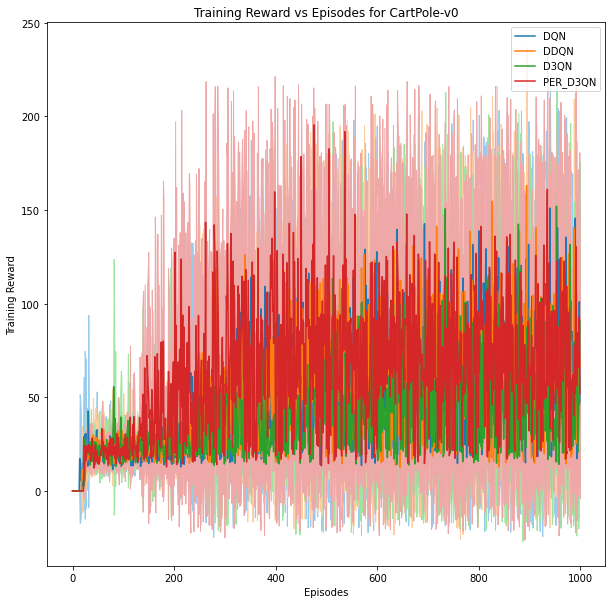

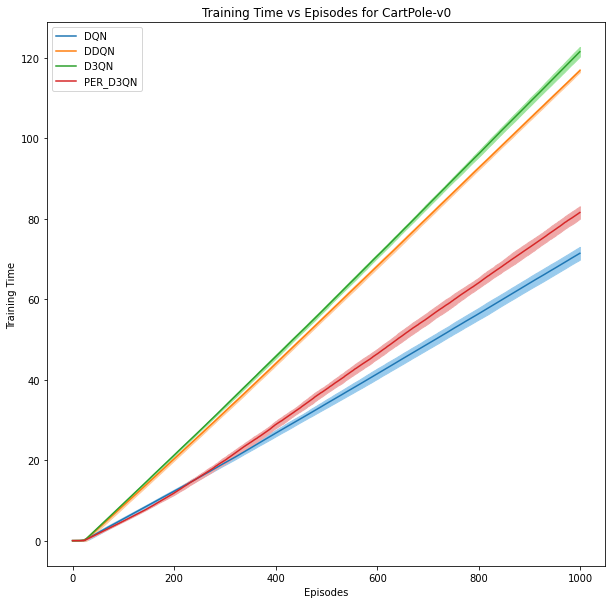

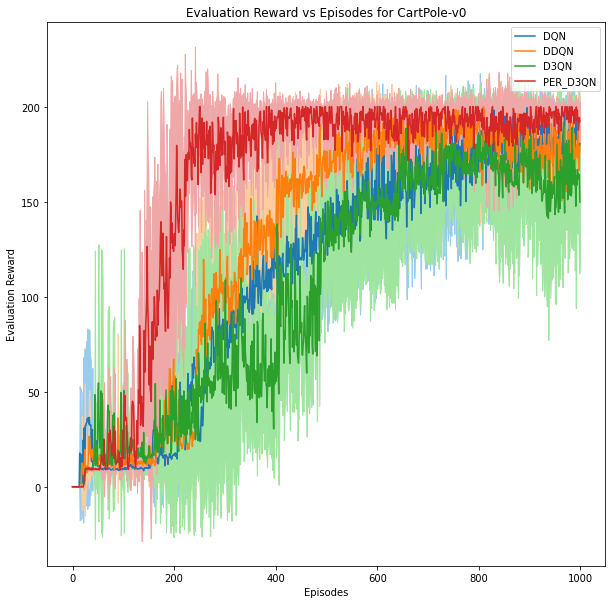

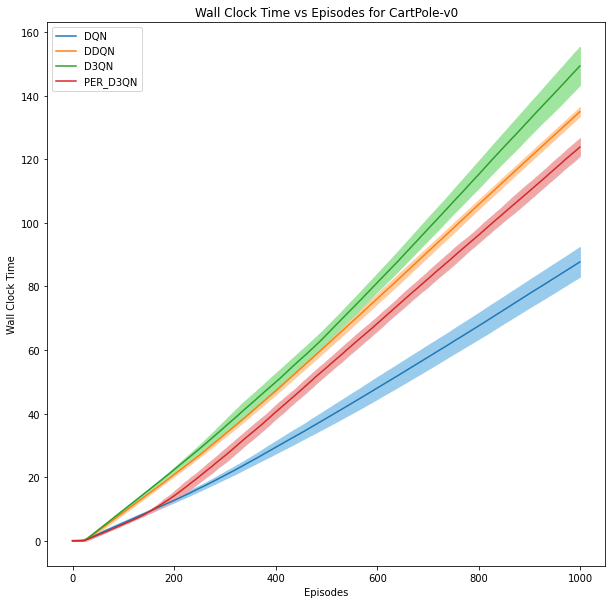

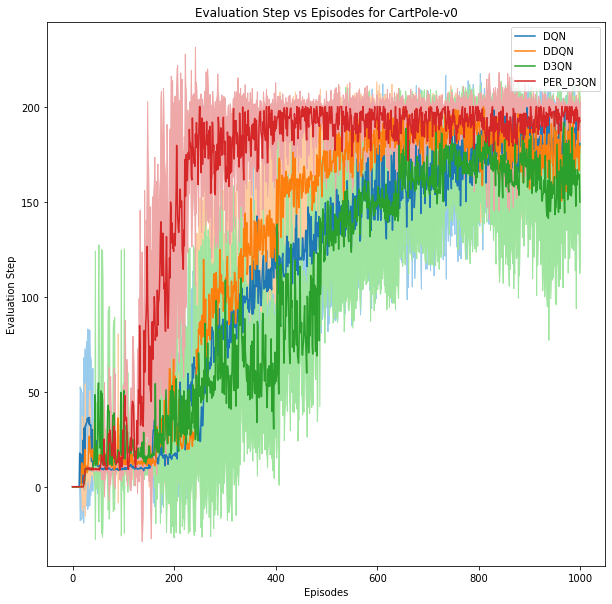

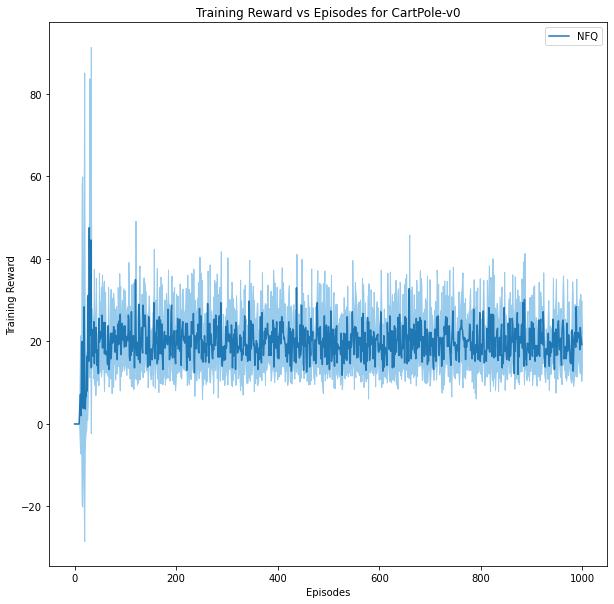

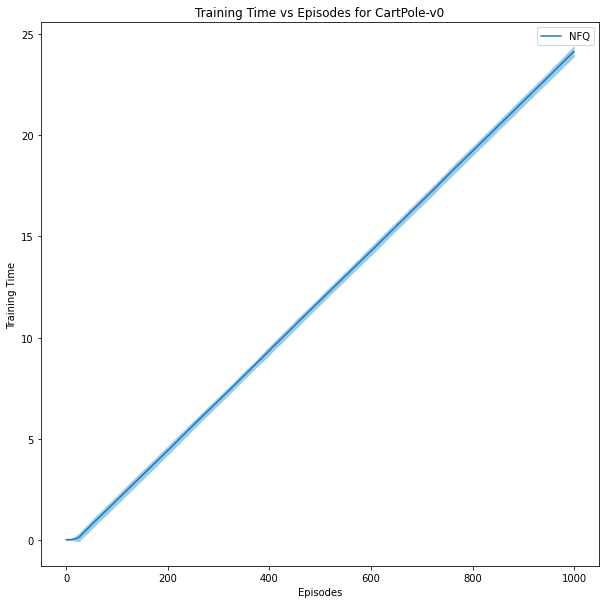

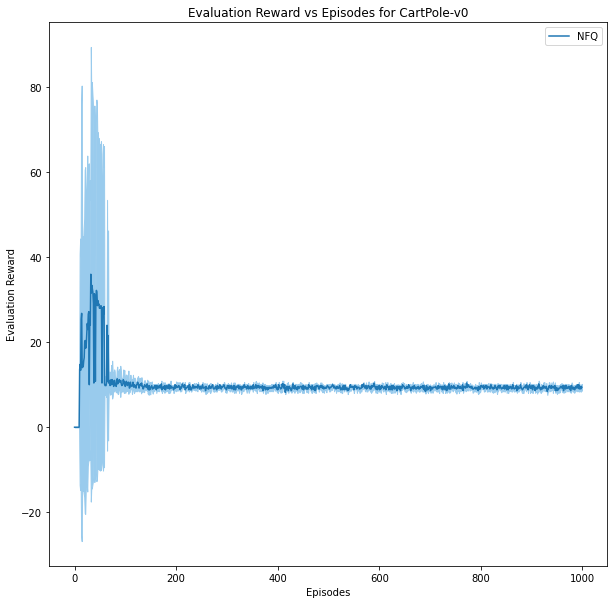

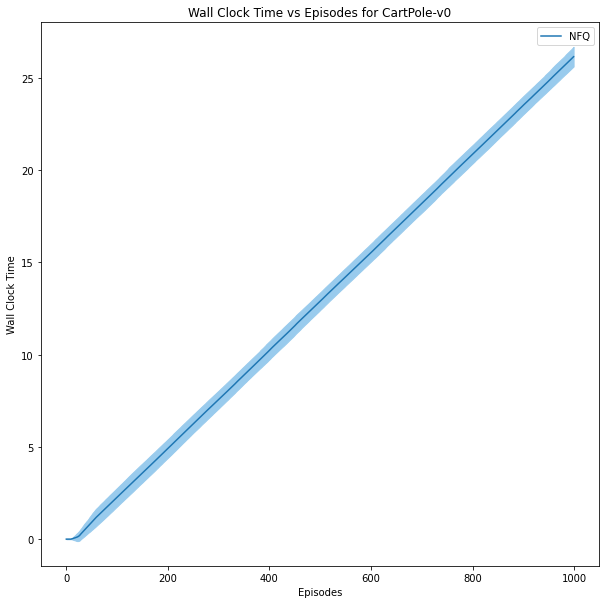

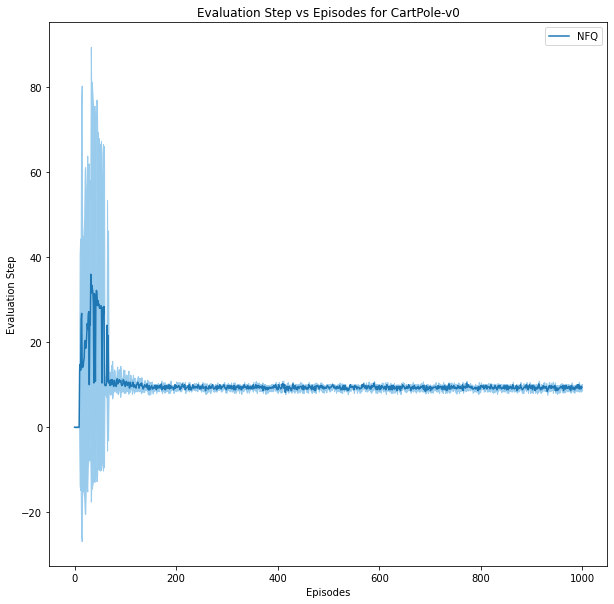

In [66]:
runDeepValueBasedAgents()